In [1]:
#importing libraries
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
#sample is the directory location of images 
dire = os.path.abspath('sample')

In [3]:
#image directory
dire

'C:\\Users\\NANI.TIRU\\Untitled Folder\\Internship\\color\\sample'

In [4]:
#couting the no.of actual images in the directory
actual_images =  [f for f in os.listdir(dire) if os.path.isfile(os.path.join(dire, f))]
len(actual_images)

24

In [5]:
# converting valid image into nummpyarray 
images = [] 
valid_images = [".jpg",".gif",".png",".tga"]
for item in os.listdir(dire) :
    ext = os.path.splitext(item)[1]
    #splitting images and checing for extension is in valid_images list or not
    if ext.lower() not in valid_images:
        continue
    img = cv2.imread(os.path.join(dire,item))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    w_new = int(100 * w / max(w, h) )
    h_new = int(100 * h / max(w, h) )
    # the resize is used to mix up all numpy values of a list into single array list
    img = cv2.resize(img, (w_new, h_new))
    # the reshape is used to split up list array into 3 dimensional 
    img = img.reshape((img.shape[0] * img.shape[1],3))
    images.append(img)

In [6]:
len(images)

24

In [7]:
def find_histogram(clt):
    # extracting unquie labels in a cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    # dividing into portions 
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    #filing up bars with color
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar


29620.png


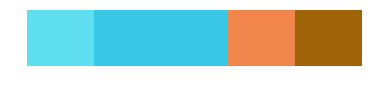

0.854318836421
-------------------------------------------------------------------------------------- 0
6-color-football-flower-remix-md.png


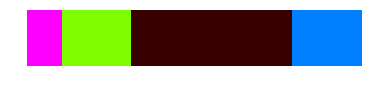

0.659943833707
-------------------------------------------------------------------------------------- 1
avatar_2_2014-wallpaper-2560x1440.jpg


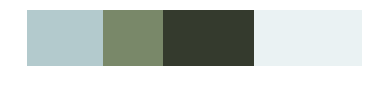

0.500593270068
-------------------------------------------------------------------------------------- 2
avatar_the_last_airbender-wide.jpg


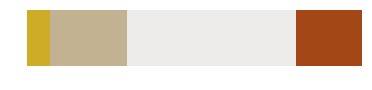

0.61651800924
-------------------------------------------------------------------------------------- 3
batman_v_superman_dawn_of_justice_2017-wallpaper-1680x1050.jpg


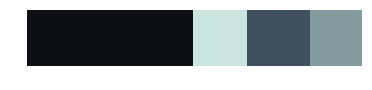

0.56195825973
-------------------------------------------------------------------------------------- 4
color_3d-wallpaper-2560x1440.jpg


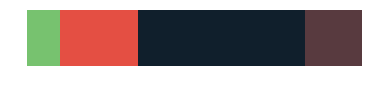

0.529185032676
-------------------------------------------------------------------------------------- 5
Deadpool_movie_44.jpg


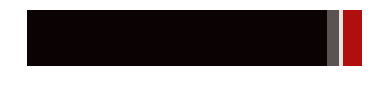

0.825160708839
-------------------------------------------------------------------------------------- 6
Deadpool_movie_iphone_124.jpg


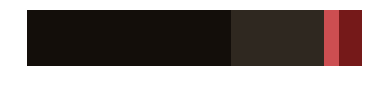

0.536462666393
-------------------------------------------------------------------------------------- 7
Deadpool_movie_iphone_128.jpg


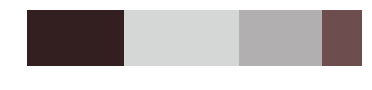

0.50357941847
-------------------------------------------------------------------------------------- 8
deadpool_ryan_reynolds_brianna_hildebrand-wallpaper-1920x1080.jpg


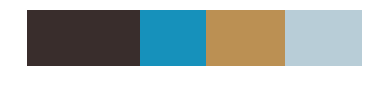

0.541399111866
-------------------------------------------------------------------------------------- 9
despicable_me_2_gru_and_minions-wallpaper-2048x1152.jpg


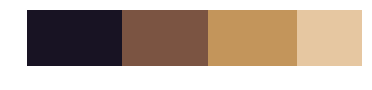

0.408014506887
-------------------------------------------------------------------------------------- 10
download (2).png


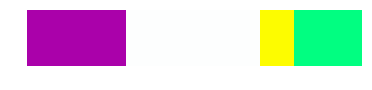

0.673952280008
-------------------------------------------------------------------------------------- 11
download (3).png


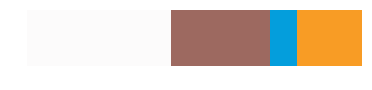

0.706672484116
-------------------------------------------------------------------------------------- 12
download.png


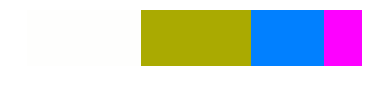

0.642862516914
-------------------------------------------------------------------------------------- 13
images (1).jpg


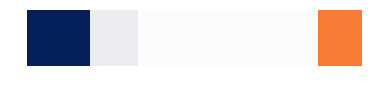

0.702756086365
-------------------------------------------------------------------------------------- 14
images (1).png


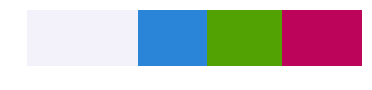

0.537636696372
-------------------------------------------------------------------------------------- 15
images (2).jpg


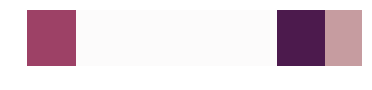

0.701896458448
-------------------------------------------------------------------------------------- 16
images (2).png


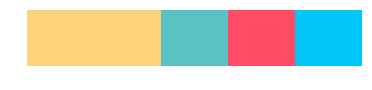

0.826455093412
-------------------------------------------------------------------------------------- 17
images (3).jpg


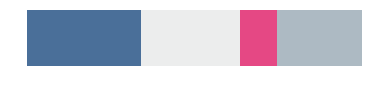

0.447331069189
-------------------------------------------------------------------------------------- 18
images (4).jpg


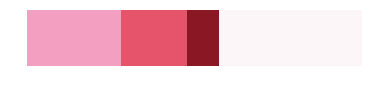

0.566535153655
-------------------------------------------------------------------------------------- 19
images.jpg


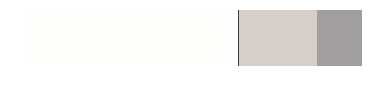

0.778903920713
-------------------------------------------------------------------------------------- 20
images.png


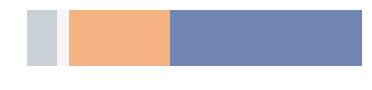

0.451426332956
-------------------------------------------------------------------------------------- 21
kobe_bryant_living_legend-wallpaper-5120x3200.jpg


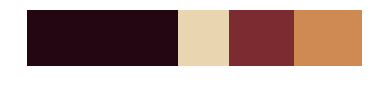

0.565296915169
-------------------------------------------------------------------------------------- 22
red_koenigsegg-wallpaper-1920x1080.jpg


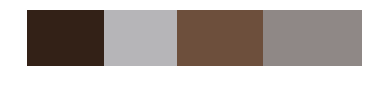

0.43946438272
-------------------------------------------------------------------------------------- 23


In [8]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
# creating a loop for all images to fit in k means
for i in range(len(images)) :
    print(actual_images[i])
    k_means = KMeans(init = "random", n_clusters = 4, n_init = 1)
    k_means.fit(images[i])

    hist = find_histogram(k_means)
    bar = plot_colors2(hist, k_means.cluster_centers_)
    #showing image bar
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    silhouette = silhouette_score(images[i], k_means.labels_, metric='euclidean')
    print(silhouette)
    print('--------------------------------------------------------------------------------------',i)

In [9]:
# displaying image and close the image after you see. 
path = os.path.abspath(actual_images[5])
a = path.split('\\')
a.insert(6,'sample')
path = "\\".join(a)
img= cv2.imread(path)
cv2.imshow('close image after done',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#error rate in images 
bestSilhouette = -1
bestClusters = 0;
accuracy = []
count_clusters = []
for clusters in range(2, 150):
    print(clusters,end = " ")
    # Cluster colours
    clt = KMeans(n_clusters = clusters)
    clt.fit(images[5])
    # Validate clustering result
    silhouette = silhouette_score(images[5], clt.labels_, metric='euclidean')
    accuracy.append(silhouette)
    count_clusters.append(clusters)
    # Find the best one
    if silhouette  > bestSilhouette:
            bestSilhouette = silhouette
            bestClusters = clusters

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 

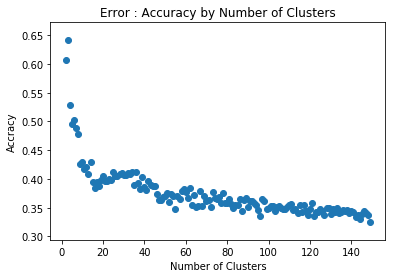

In [11]:
# plotting the 
plt.title("Error : Accuracy by Number of Clusters")
plt.scatter(count_clusters, accuracy)
plt.xlabel("Number of Clusters")
plt.ylabel("Accracy")
plt.show()